In [125]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
drug_data= pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
clinical_df = pd.merge(mouse_data, drug_data, how='outer', on='Mouse ID')

# Display the data table for preview
clinical_df.head(6)


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2


## Tumor Response to Treatment

In [126]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

grouped_clinicals = clinical_df.groupby(['Drug', 'Timepoint'])


# Convert to DataFrame
mean_df = pd.DataFrame(grouped_clinicals['Tumor Volume (mm3)'].mean())

# Preview DataFrame
mean_df.head()



#google:"DataFrame indexes"

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [127]:
mean_df = pd.DataFrame(grouped_clinicals['Tumor Volume (mm3)'].mean())
mean_df.reset_index(inplace=True)
mean_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [128]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_df = pd.DataFrame(grouped_clinicals['Tumor Volume (mm3)'].sem())
sem_df.reset_index(inplace=True)

# Convert to DataFrame

# Preview DataFrame
sem_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [129]:
drug_grps = clinical_df.pivot_table(clinical_df, index=['Drug','Timepoint'], aggfunc='mean')

In [130]:
# Minor Data Munging to Re-Format the Data Frames
df_by_drugs = drug_grps.pivot_table('Tumor Volume (mm3)', ['Timepoint'],'Drug')

# Preview that Reformatting worked
df_by_drugs.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [131]:
sem_pvt = clinical_df.pivot_table(clinical_df, index=['Drug','Timepoint'], aggfunc='sem')
sem_by_drugs = sem_pvt.pivot_table('Tumor Volume (mm3)', ['Timepoint'],'Drug')
sem_by_drugs

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


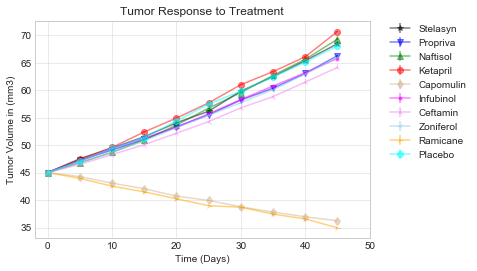

In [132]:
# Generate the Plot (with Error Bars)

x_axis = np.arange(0, 50, 5)
drug_list = clinical_df['Drug'].unique()
drug_count = np.arange(0,len(drug_list))


colors = ['black','blue','green','red','tan','magenta','violet','skyblue','orange','aqua']
markers = ['*','v','^','o','d','.','2','3','4','8']

plt.xlim(-2,50)
plt.style.use('seaborn-whitegrid')
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume in (mm3)")
plt.grid(alpha = 0.5)


for i in drug_count:
    standard_errors = sem_by_drugs[drug_list[i]].sem()
    plt.errorbar(x_axis, df_by_drugs[drug_list[i]], yerr = standard_errors, marker= markers[i], color= colors[i], alpha=0.5, label=drug_list[i])
plt.legend(bbox_to_anchor=(1.05,1),loc= 2, borderaxespad = 0., labels=drug_list)

# Save the Figure
plt.savefig('plot_name.png', format="png")


In [133]:
# Show the Figure
plt.show()
#drug_grps = clinical_df.pivot_table(clinical_df, index=['Drug','Timepoint'], aggfunc='mean')

## Metastatic Response to Treatment

In [134]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint. Metastatic Sites

# Convert to DataFrame
metSite_mean = pd.DataFrame(drug_grps['Metastatic Sites'])
# Preview DataFrame
metSite_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [135]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metSite_sem = pd.DataFrame(grouped_clinicals['Metastatic Sites'].sem())
# Convert to DataFrame
metSite_sem.head()
# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [136]:
#sem_pvt = clinical_df.pivot_table(clinical_df, index=['Drug','Timepoint'], aggfunc='sem')
#sem_by_drugs = sem_pvt.pivot_table('Tumor Volume (mm3)', ['Timepoint'],'Drug')
met_by_drugs = drug_grps.pivot_table('Metastatic Sites', ['Timepoint'],'Drug')
met_by_drugs

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [137]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


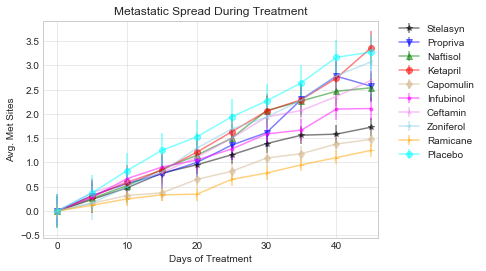

In [138]:
# Generate the Plot (with Error Bars)

# Save the Figure

x_axis = np.arange(0, 50, 5)
drug_list = clinical_df['Drug'].unique()
drug_count = np.arange(0,len(drug_list))
plt.xlim(0,50)

colors = ['black','blue','green','red','tan','magenta','violet','skyblue','orange','aqua']
markers = ['*','v','^','o','d','.','2','3','4','8']

plt.style.use('seaborn-whitegrid')
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Days of Treatment")
plt.ylabel("Avg. Met Sites")
plt.grid(alpha = 0.5)
plt.xlim(-2,46)

for i in drug_count:
    standard_errors = met_by_drugs[drug_list[i]].sem()
    plt.errorbar(x_axis, met_by_drugs[drug_list[i]], yerr = standard_errors, marker= markers[i], color= colors[i], alpha=0.5, label=drug_list[i])
plt.legend(bbox_to_anchor=(1.05,1),loc= 2, borderaxespad = 0., labels=drug_list)

# Save the Figure
plt.savefig('plot2_name.png', format="png")





In [139]:
surv_mouse = clinical_df.drop(['Tumor Volume (mm3)', 'Metastatic Sites'], axis=1)
surv_mouse.head()

,Mouse ID,Drug,Timepoint
0,f234,Stelasyn,0
1,f234,Stelasyn,5
2,f234,Stelasyn,10
3,f234,Stelasyn,15
4,f234,Stelasyn,20


## Survival Rates

In [140]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival = surv_mouse.pivot_table(surv_mouse, index=['Drug','Timepoint'], aggfunc='count')

# Convert to DataFrame
survival = survival.rename(columns={"Mouse ID": "Mouse Count"})
survival = survival_table=survival.pivot_table('Mouse Count', ['Timepoint'],'Drug' )

# Preview DataFrame
survival.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [141]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


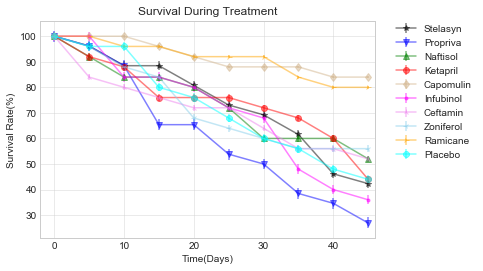

In [142]:
x_axis = np.arange(0, 50, 5)
drug_list = clinical_df['Drug'].unique()
drug_count = np.arange(0,len(drug_list))
plt.xlim(0,50)

colors = ['black','blue','green','red','tan','magenta','violet','skyblue','orange','aqua']
markers = ['*','v','^','o','d','.','2','3','4','8']

plt.style.use('seaborn-whitegrid')
plt.title("Survival During Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Survival Rate(%)")
plt.grid(alpha = 0.5)
plt.xlim(-2,46)

for i in drug_count:
    standard_errors = survival[drug_list[i]].sem()
    plt.errorbar(x_axis, (survival[drug_list[i]]/max(survival[drug_list[i]]))*100, yerr = standard_errors, marker= markers[i], color= colors[i], alpha=0.5, label=drug_list[i])
plt.legend(bbox_to_anchor=(1.05,1),loc= 2, borderaxespad = 0., labels=drug_list)

# Save the Figure
plt.savefig('plot3_name.png', format="png")

# Save the Figure
#plt.savefig('plot3_name.png', format="png")

In [143]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [164]:
# Calculate the percent changes for each drug
smol_vol = df_by_drugs.iloc[[0,-1]]
percent_change = ((smol_vol-smol_vol.iloc[0])/smol_vol.iloc[0])*100
percent_delta = percent_change.loc[1:]

# Display the data to confirm
#percent_change.loc[1:]

In [165]:
percent_delta.sum()

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [145]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

NameError: name 'fig' is not defined

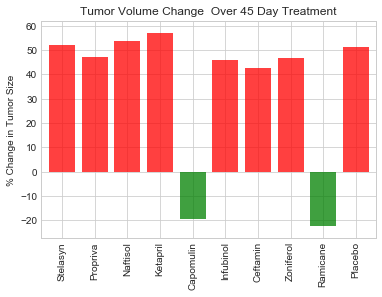

<Figure size 432x288 with 0 Axes>

In [168]:
plt.style.use('seaborn-whitegrid')
performance = {}
for x in drug_count:
    performance[drug_list[x]] = float(percent_delta[drug_list[x]])
x_axis = np.arange(0, len(drug_list))
tick_locations = []
for x in x_axis:
    tick_locations.append(x + 0.4)
plt.xlim(-0.25, len(drug_list))
plt.ylim(min(performance.values()) - 5, max(performance.values()) + 5)
plt.title("Tumor Volume Change  Over 45 Day Treatment")
plt.ylabel("% Change in Tumor Size")
bar_colors = pd.Series(list(performance.values()))
bar_colors = bar_colors > 0
bar_colors = bar_colors.map({True: "Red", False: "Green"})
plt.xticks(tick_locations, performance, rotation="vertical")
plt.bar(x_axis, performance.values(), color=bar_colors, alpha=0.75, align="edge")
plt.show()
plt.savefig('bar_chart.png', format="png")